# 7 Multiple Regression

Multiple regression is an extension of simple linear regression, where we have more than one independent variables.

## 7.1 Model

Consider the population regression model
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2+...+\beta_kx_k+u$$

There are $k$ independent variables, and $p\equiv(k+1)$ parameters. The interpretation of $\beta_0$ is the expected value of y when $x_1=x_2=...=x_k=0$. And $\beta_1$ is the partial derivative of $y$ w.r.t $x$, which means, all else equal, when $x_1$ increase by 1, the expected value of y will increase by $\beta_1$.

## 7.2 Method - OLS

We can use OLS to obtain the estimators - $\hat{\beta}$s. Similarly,

$$\min_{\beta_0,\beta_1,...,\beta_k} (y-(\beta_0+\beta_1x_k+...\beta_kx_k))^2$$

The analytical results for $\hat{\beta}$s are more complex than that of a simple linear regression, so we do not list them here, but they are implemented in the statsmodels package.

## 7.3 Package - statsmodels


Suppose the data set sample contains variables y,x1,x2,x3, with the respective data of our sample. We estimate the model using commands.

```python
    reg = smf.ols(formula="y~x1+x2+x3", data=sample)
    res = reg.fit()
    print(res.summary())
```

## Exercise
Data: wooldridge - gpa1

Estimate a model that relates college GPA (*colGPA*) to the high school GPA (*hsGPA*) and achievement test score (*ACT*) for a sample of 141 students. 

In [2]:
import wooldridge as woo
import statsmodels.formula.api as smf

df = woo.data("gpa1")
df.head()

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
0,21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2.0,1.0,1,0,0
1,21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0.0,1.0,1,1,1
2,20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0.0,1.0,1,1,1
3,19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0.0,0.0,0,0,0
4,20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0.0,1.5,1,1,0


In [3]:
reg = smf.ols("colGPA~hsGPA + ACT", data=df)
res = reg.fit()
print(res.summary())
b0_h, b1_h, b2_h = res.params

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.53e-06
Time:                        13:04:15   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.0

You can also extract specific results using the following properties:
- **params** for regression coefficients
- **resid** for the residual-hats
- **rsquared** for $R^2$
- and [more](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

# 7.4 Visualization when there are two independent variables.

When there are two independent variables, it is still possible to graphically display the relationship between dependent and independent variables (3 variables in total - so a 3D plot).

*matplotlib* provide simple ways to create 3d visualizations. [Check this document](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html) for more details.

In [13]:
b0_h, b1_1, b2_h = res.params

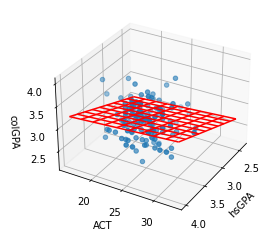

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# new canvas
fig = plt.figure()
# convert to 3D canvas
ax = fig.add_subplot(111, projection='3d') # create a 1 row 1 column grid, draw at the 1st grid

# scatter plot
ax.scatter(df["hsGPA"],df["ACT"],df["colGPA"])

ax.set_xlabel('hsGPA')
ax.set_ylabel('ACT')
ax.set_zlabel('colGPA')

# fitted surface
x1 = np.linspace(np.min(df["hsGPA"]),np.max(df["hsGPA"]),10)
x2 = np.linspace(np.min(df["ACT"]),np.max(df["ACT"]),10)
# meshgrid - create pairs
X1,X2 = np.meshgrid(x1,x2)

Y_h = b0_h+b1_h*X1+b2_h*X2
ax.plot_wireframe(X1,X2,Y_h, color="r")
ax.view_init(azim=30,elev=30)

In [ ]:
#rotate the figure
ax.view_init(azim = -60, elev = 30)  
plt.show()
    
#save the figure
# plt.savefig("surf.png")
# plt.show()

> ![azim and elev](./images/azimuth-elevation.jpg)

### Animation

matplotlib provides a module called *matplotlib.animation* to animate your graph. But before coding, let's first download a package called ffmpeg. In you terminal type:
```
conda install ffmpeg
```

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML, Video #I and P are both capital letters

# plt.rcParams["animation.ffmpeg_path"] = "/Users/benx/opt/anaconda3/bin/ffmpeg"

def animate(i):
    ax.view_init(azim = i, elev = 30)  # update the data.

ani = animation.FuncAnimation(fig, func=animate, frames=range(0,360,10), interval=100) 
print("...saving the video to file, please wait")
ani.save("video.mp4")
print("video saved")

# without saving
# print("...converting the video, please wait")
# display(HTML(ani.to_html5_video()))

...saving the video to file, please wait
video saved


In [5]:
from IPython.display import Video
Video("video.mp4")

Alternatively, you can install the `ipympl` (IPython-matplotlib) package and add `%matplotlib widget` before your animation code.

### More about fig.add_subplot()

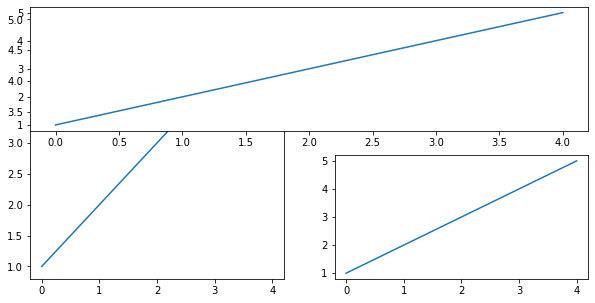

In [6]:
# example data
x= np.arange(5)
y = x+1
# Try subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1) # 1 row 2 columns grid, paint at grid 1
ax.plot(x,y)
ax2 = fig.add_subplot(2,1,1) # this is painted on top of the previous command
ax2.plot(x,y)
ax3 = fig.add_subplot(2,2,4) # 2 rows 2 columns grid, paint at grid 4 - left to right, top-down
ax3.plot(x,y)
plt.show()

# 7.5 Interpret the Estimation Table

In [7]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.53e-06
Time:                        23:31:02   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.0

### 7.5.1 Mid-Panel

Since there are multiple independent variables, the coefficients should be interpreted as **partial** effects (or **ceteris paribus** effects). For example, 0.4535 is the estimated average effect of increasing hsGPA by 1 unit while keeping ACT fixed.

In [8]:
print(res.params)
type(res.params)

Intercept    1.286328
hsGPA        0.453456
ACT          0.009426
dtype: float64


pandas.core.series.Series

In [9]:
print(res.bse)

Intercept    0.340822
hsGPA        0.095813
ACT          0.010777
dtype: float64


In [10]:
# extra robust standard errors
print(res.HC0_se)

Intercept    0.356073
hsGPA        0.098134
ACT          0.010682
dtype: float64


### 7.5.2 Top-Panel

### Adj. R-squared


An issue arises when there are more than one independent variable: the more variable you add to the model, the higher fraction of total variation is explained - SSR/SST will increase. This will lead analysts to keep adding in more and more variables.

To address this problem, a new measure - $R^2_{adj}$ is developed to penalize the number of variables.

$$R^2{adj} = 1-\frac{SS_{error}/df_{error}}{SS_{total}/df_{total}}$$

where $df_{error} = n-k-1$, because estimated residuals are restricted by **k+1** first order conditions. And $df_{tot}=n-1$ because $(y-\bar{y})$ is restricted by $\bar{y} = \sum y$

In [11]:
print(res.rsquared)
print(res.rsquared_adj)

0.17642159703480642
0.1644856781512528


### F-statistic - overall significance test

F distribution is result of a division of two $\chi^2$ distributions adjusted by their corresponding degrees of freedom. For example, if $X \sim \chi^2(1)$ and $Y \sim \chi^2(2)$. Then $\frac{X/1}{Y/2} \sim F(1,2)$.

In the estimation table, obtain $SS_{error}$ from the original model, and $SS_{error}/\sigma^2 \sim \chi^2(n-k-1)$. We obtain $SS_{error}^{restricted}$ from another regression called the restricted model.
$$y = \beta_0 + u$$

In the restricted model, all coefficients are assumed to be zero. And we know that $SS_{error}^r/\sigma^2 \sim \chi^2(n-1)$.

$H_0: \beta_1 = \beta_2 =...=\beta_k =0$

If the null hypothesis is true. $\frac{(SS^r_{error} - SS_{error}^u)}{SS^u_{error}} = \frac{(SST - SS_{error})}{SS_{error}} \sim F(k, n-k-1)$

Therefore, when the F statistic is large or alternatively, when the corresponding p value is small, we will reject the null hypothesis and conclude that the model is overall significant.

In [12]:
print(res.fvalue)
print(res.f_pvalue)

14.78073022747308
1.526305641575321e-06


### Log-Likelihood, AIC, BIC

We will introduce log-likelihood (abbr. $lnL$) in another chapter -  for now, you only need to know that this is a negative number (due to the logarithm), and the larger the number the better (more likely) the model fits to the data.

The Akaike information criterion (AIC) = $2p-2lnL$ is similar to the adjusted $R^2$, where we penalize the number of independent variables. **The lower the value the better the model**.

Bayesian information criterion (BIC) = $pln(n) - 2lnL$ is similar to AIC, but it is derived based on Bayes' Theorem. **The lower the value the better the model**.

In [13]:
print(res.llf)
print(res.aic)
print(res.bic)

-46.572868963784174
99.14573792756835
107.99201759870286


### 7.5.3 Bottom-Panel

### Condition Number

Conditional number is calculated as ratio of largest to smallest singular value of **X**. A large condition number (usually > 10,000) means that the matrix is close to being singular - multicollinearity.

In [14]:
res.condition_number

298.0027257519856

For a detailed illustration, see [this blog](https://blogs.mathworks.com/cleve/2017/07/17/what-is-the-condition-number-of-a-matrix/)

### Use VIF to test for multicollinearity.

The variance inflation factor ($VIF_j$) accounts for multicollinearity. If $x_j$ is highly related to the other regressors, $R_j^2$ - the $R^2$ from a regression of $x_j$ on all of the other regressors - will be high. 

And $VIF_j = \frac{1}{1-R_j^2}$ will also be high.

Thus, a high $VIF_j$ indicates multicollinearity.

The name of VIF is from the fact that in a multiple regression: 
$$Var(\hat{\beta_j}) = \frac{\sigma^2}{nVar(x_j)}*VIF_j$$

In [15]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo

X = df[["hsGPA","ACT"]]
X = sm.add_constant(X)

print("VIF")
for i in range(1,X.shape[1]):
    print("{:<8s} {:.2f}".format(X.columns[i],smo.variance_inflation_factor(X.to_numpy(),i)))
#convert DataFrame to numpy ndarray first. You can also use .values

VIF
hsGPA    1.14
ACT      1.14


> You can check [this tutorial](https://realpython.com/python-formatted-output/) for more about string formatting.

VIF of the constant term is usually not interpreted, because the constant term is added into the model to obtain better statistic properties, not to explain the dependent variable. A rule of thumb cut-off VIF is 5 (or 10), if VIF is greater than 5 (or 10), the model is subject to multicollinearity, and you should remove that variable from the model.

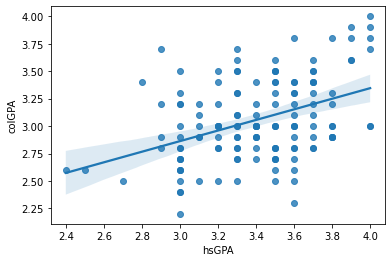

In [16]:
import seaborn as sns
sns.regplot(x="hsGPA",y="colGPA",data=df)
plt.show()
# high VIF for const is due to the approximately horizontal relationship between hsGPA and colGPA.

## 7.6 Other useful tips

### 7.6.1 Use all variables as independent variable

To add in many variables at a time, you can construct the formula before you call the smf.ols function.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       141 non-null    int64  
 1   soph      141 non-null    int64  
 2   junior    141 non-null    int64  
 3   senior    141 non-null    int64  
 4   senior5   141 non-null    int64  
 5   male      141 non-null    int64  
 6   campus    141 non-null    int64  
 7   business  141 non-null    int64  
 8   engineer  141 non-null    int64  
 9   colGPA    141 non-null    float64
 10  hsGPA     141 non-null    float64
 11  ACT       141 non-null    int64  
 12  job19     141 non-null    int64  
 13  job20     141 non-null    int64  
 14  drive     141 non-null    int64  
 15  bike      141 non-null    int64  
 16  walk      141 non-null    int64  
 17  voluntr   141 non-null    int64  
 18  PC        141 non-null    int64  
 19  greek     141 non-null    int64  
 20  car       141 non-null    int64 

In [18]:
formula = "+".join(df.columns)
# to revert: formula.split("+")
formula = "colGPA~" + formula + "-colGPA"
print(formula)

colGPA~age+soph+junior+senior+senior5+male+campus+business+engineer+colGPA+hsGPA+ACT+job19+job20+drive+bike+walk+voluntr+PC+greek+car+siblings+bgfriend+clubs+skipped+alcohol+gradMI+fathcoll+mothcoll-colGPA


In [19]:
reg = smf.ols(formula = formula, data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     2.754
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           0.000120
Time:                        23:31:02   Log-Likelihood:                -25.896
No. Observations:                 141   AIC:                             105.8
Df Residuals:                     114   BIC:                             185.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2989      0.513      0.583      0.5

### 7.6.2 Categorical Variables and Dummy Variables

Sometimes a variable may not contain numerical values (e.g. Country Name, ID). In this case you can use `C(varname)` in the formula. *smf* will convert the categorical variable to several indicators and add them into your model. For example

In [20]:
import pandas as pd
df2 = pd.DataFrame({"GDP":[2,2,3,4,5], "Region":["EU","NA","NA","AS","AF"]})
print(df2)

   GDP Region
0    2     EU
1    2     NA
2    3     NA
3    4     AS
4    5     AF


In [21]:
print(smf.ols("GDP ~ C(Region)", df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     4.200
Date:                Mon, 11 Oct 2021   Prob (F-statistic):              0.341
Time:                        23:31:02   Log-Likelihood:                -1.3382
No. Observations:                   5   AIC:                             10.68
Df Residuals:                       1   BIC:                             9.114
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.0000      0.707     

/Users/benx/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### 7.6.3 Functions inside formula
You can also include functions inside the formula to transform your data

In [22]:
import numpy as np
print(smf.ols(data=df, formula = "colGPA~np.log(ACT)").fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.737
Date:                Mon, 11 Oct 2021   Prob (F-statistic):             0.0179
Time:                        23:31:02   Log-Likelihood:                -57.405
No. Observations:                 141   AIC:                             118.8
Df Residuals:                     139   BIC:                             124.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0914      0.821      1.329      

> [More](https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html#examples-notebooks-generated-formulas--page-root)

### 7.6.4 Curse of Dimensionality

The **curse of dimensionality** refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces.

In a regression model, this means adding in more variables is not always good.

The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.